# Correlation

Correlation coefficients quantify the association between variables or features of a dataset.

When data is represented in the form of a table, the rows of that table are usually the observations, while the columns are the features. Take a look at this employee table:

|Name|	Years of Experience|Annual Salary|
|---|---|---|
|Ann|	30	|120,000|
|Rob|	21	|105,000|
|Tom|	19	|90,000|
|Ivy|	10	|82,000|

In this table, each row represents one observation, or the data about one employee (either Ann, Rob, Tom, or Ivy). Each column shows one property or feature (name, experience, or salary) for all the employees.

If you analyze any two features of a dataset, then you’ll find some type of correlation between those two features. Consider the following figures:

<img src="pic/py-corr-1.webp">

Each of these plots shows one of three different forms of correlation:

- <b>Negative correlation (red dots)</b>: In the plot on the left, the y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

- <b>Weak or no correlation (green dots)</b>: The plot in the middle shows no obvious trend. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

- <b>Positive correlation (blue dots)</b>: In the plot on the right, the y values tend to increase as the x values increase. This illustrates strong positive correlation, which occurs when large values of one feature correspond to large values of the other, and vice versa.

The next figure represents the data from the employee table above:

<img src="pic/py-corr-6.webp">

The correlation between experience and salary is positive because higher experience corresponds to a larger salary and vice versa.

There are several statistics that you can use to quantify correlation. 

- Pearson’s r
- Spearman’s rho
- Kendall’s tau

Pearson’s coefficient measures `linear correlation`, while the Spearman and Kendall coefficients compare the `ranks` of data. 

## Linear Correlation

Linear correlation measures the proximity of the mathematical relationship between variables or dataset features to a linear function. If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.

### Pearson Correlation Coefficient

The `Pearson (product-moment) correlation coefficient` is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. You can express this value mathematically with this equation:

$$r=\dfrac{\sum(x_i-E(X))(y_i-E(Y))}{\sqrt{\sum(x_i-E(X))^2\sum(y_i-E(Y))^2}}$$

$$VAR(X) = \dfrac{1}{n-1}\sum_{i=1}^{n}(x_i - E(X))^2$$ 

$$COV(X, Y) = \dfrac{1}{n-1}\sum_{i=1}^{n}(x_i - E(X))(y_i - E(Y))$$ 

$$CORR(X, Y) = \dfrac{COV(X, Y)}{\sqrt{VAR(X)VAR(Y)}}$$ 

<p align="center">
<img src="pic/correlation-formula.png">
</p>

Here are some important facts about the Pearson correlation coefficient:

|Pearson’s r Value|	Correlation Between x and y|
|---|---|
|equal to 1|	perfect positive linear relationship|
|greater than 0|	positive correlation|
|equal to 0|	no linear relationship|
|less than 0|	negative correlation|
|equal to -1|	perfect negative linear relationship|

## Rank Correlation

Rank correlation compares the ranks or the orderings of the data related to two variables or dataset features. If the orderings are similar, then the correlation is strong, positive, and high. However, if the orderings are close to reversed, then the correlation is strong, negative, and low. In other words, rank correlation is concerned only with the order of values, not with the particular values from the dataset.

To illustrate the difference between linear and rank correlation, consider the following figure:

<img src="pic/py-corr-2.webp">

The left plot has a perfect positive linear relationship between x and y, so r = 1. The central plot shows positive correlation and the right one shows negative correlation. However, neither of them is a linear function, so r is different than −1 or 1.

When you look only at the orderings or ranks, all three relationships are perfect! The left and central plots show the observations where larger x values always correspond to larger y values. This is perfect positive rank correlation. The right plot illustrates the opposite case, which is perfect negative rank correlation.

### Spearman Correlation Coefficient

The Spearman correlation coefficient between two features is the Pearson correlation coefficient between their rank values. It’s calculated the same way as the Pearson correlation coefficient but takes into account their ranks instead of their values. It’s often denoted with the Greek letter rho (ρ) and called Spearman’s rho.

Here are some important facts about the Spearman correlation coefficient:

- It can take a real value in the range −1 ≤ ρ ≤ 1.

- Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.

- Its minimum value ρ = −1 corresponds to the case when there’s a monotonically decreasing function between x and y. In other words, larger x values correspond to smaller y values and vice versa.

You can calculate Spearman’s rho in Python in a very similar way as you would Pearson’s r.

### Kendall Correlation Coefficient

Let’s start again by considering two n-tuples, x and y. Each of the x-y pairs (x₁, y₁), (x₂, y₂), … is a single observation. A pair of observations (xᵢ, yᵢ) and (xⱼ, yⱼ), where i < j, will be one of three things:

- concordant if either (xᵢ > xⱼ and yᵢ > yⱼ) or (xᵢ < xⱼ and yᵢ < yⱼ)
- discordant if either (xᵢ < xⱼ and yᵢ > yⱼ) or (xᵢ > xⱼ and yᵢ < yⱼ)
- neither if there’s a tie in x (xᵢ = xⱼ) or a tie in y (yᵢ = yⱼ)

The Kendall correlation coefficient compares the number of concordant and discordant pairs of data. This coefficient is based on the difference in the counts of concordant and discordant pairs relative to the number of x-y pairs. It’s often denoted with the Greek letter tau (τ) and called Kendall’s tau.

Some important facts about the Kendall correlation coefficient are as follows:

- It can take a real value in the range −1 ≤ τ ≤ 1.

- Its maximum value τ = 1 corresponds to the case when the ranks of the corresponding values in x and y are the same. In other words, all pairs are concordant.

- Its minimum value τ = −1 corresponds to the case when the rankings in x are the reverse of the rankings in y. In other words, all pairs are discordant.

You can calculate Kendall’s tau in Python similarly to how you would calculate Pearson’s r.

## Pearson's correlation with Numpy

In [1]:
import numpy as np

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
r = np.corrcoef(x, y)
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

## Correlation with Scipy

In [2]:
import numpy as np
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

# Pearson's r
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=0.758640289091187, pvalue=0.010964341301680813)

In [3]:
# Spearman's rho
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [4]:
# Kendall's tau
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

Note that these functions return objects that contain two values:

1. The correlation coefficient
2. The p-value

## Correlation with Pandas

In [6]:
import pandas as pd

x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

In [7]:
# Pearson's r
x.corr(y)

0.7586402890911867

In [8]:
y.corr(x)

0.7586402890911869

In [9]:
# Spearman's rho
x.corr(y, method='spearman')

0.9757575757575757

In [10]:
# Kendall's tau
x.corr(y, method='kendall')

0.911111111111111

## Visualization of Correlation

### X-Y Plots with a Regression Line

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [12]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [13]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=-85.93+7.44x, r=0.76'

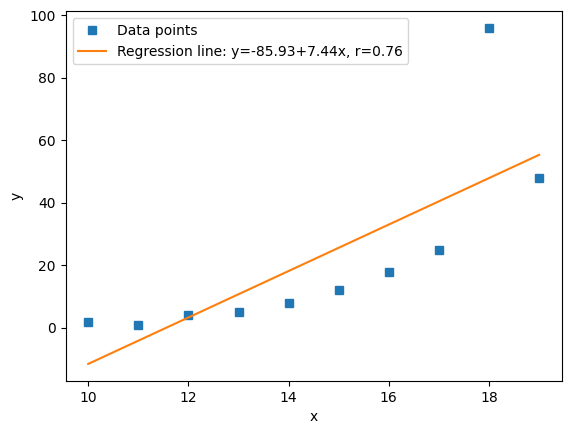

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### Heatmaps of Correlation Matrices

In [16]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

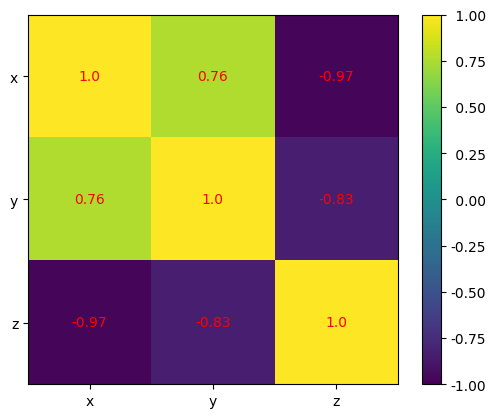

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

## References

- [NumPy, SciPy, and pandas: Correlation With Python](https://realpython.com/numpy-scipy-pandas-correlation-python/#visualization-of-correlation)